In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/elsevier/Bert-NER'
%cd $path
import utils_annotate
import utils_train as ut
import os
!pip install highlight-text
import matplotlib.pyplot as plt
from highlight_text import HighlightText

Mounted at /content/drive
/content/drive/MyDrive/elsevier/Bert-NER


In [15]:
data_all = utils_annotate.load_json('src_data/2024-02-14_sciencedirect_machine+learning+interatomic+potential_120.json')
data_all = [d for d in data_all if d['abstract'] != None]
print(f"Number of entries: {len(data_all)}")
print(len(os.listdir('individual_ner')))
# os.listdir('individual_ner')

Number of entries: 102
46


In [ ]:
index = 46
name = data_all[index]['prism:doi'].replace('/', '')
print(name)
word_list, categories = utils_annotate.annotate(data_all[index]['abstract'],
 ['O', 'MATERIAL', 'MLIP', 'PROPERTY', 'SIMULATION', 'VALUE', 'APPL'], name)

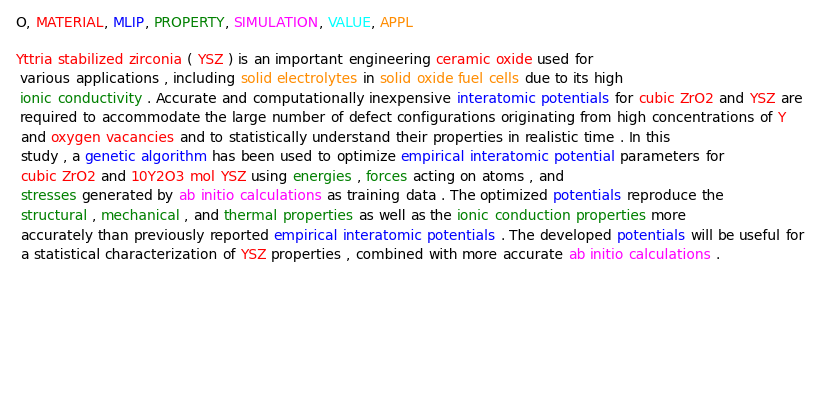

In [17]:
colors = {'O': 'black', 'MATERIAL': 'red', 'MLIP': 'blue', 'PROPERTY': 'green',
          'SIMULATION': 'magenta', 'VALUE': 'cyan', 'APPL': 'darkorange'}
word_list_marked = ['<' + w + '>' for w in word_list]
markers = [{"color": colors[i]} for i in categories]
j = 0
for i in range(len(word_list)):
    if (i + 1) % 15 == 0:
        word_list_marked.insert(i + j, '\n')
        j += 1
fig, ax = plt.subplots()
ax.set_axis_off()
HighlightText(x=0., y=1, s='<O>, <MATERIAL>, <MLIP>, <PROPERTY>, <SIMULATION>, <VALUE>, <APPL>',
              highlight_textprops=[{"color": c} for c in list(colors.values())], ax=ax)
HighlightText(x=0., y=0.9, s=' '.join(word_list_marked),
              highlight_textprops=markers, ax=ax)
plt.show()

In [ ]:
data = utils_annotate.combine_records('individual_ner')
SEED = 1421
ut.seed_everything(SEED)
utils_annotate.json_train_test('train_test_data', data, 3, shuffle=True)